In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
def plot_logo(x, y, image, ax, zoom=1):
    '''Help function for plotting logos on ax'''
    image = plt.imread(image)
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

# Stemwijzer
Data van de stemwijzer voor de Tweede Kamer verkiezingen.

Codering:
- `1`: `Eens`
- `0`: `Neutraal`
- `-1`: `Oneens`

In [3]:
zetels = ['vvd', 'pvv', 'cda', 'd66', 'groenlinks', 'sp', 'pvda',
          'cu', 'pvdd', '50plus', 'sgp', 'denk', 'fvd']

stemwijzer = pd.read_csv('data/stemwijzer.csv', index_col=0)

stemwijzer_totaal = stemwijzer.transpose()
partijen_totaal = stemwijzer_totaal.index
len(stemwijzer_totaal)

24

In [4]:
# Zittende partijen
stemwijzer_zetel = stemwijzer[zetels].transpose()
partijen_zetel = stemwijzer_zetel.index
len(stemwijzer_zetel)

13

In [5]:
# Niet-zittende partijen
stemwijzer_nieuw = stemwijzer.drop(zetels, axis=1).transpose()
partijen_nieuw = stemwijzer_nieuw.index
len(stemwijzer_nieuw)

11

## Correlation

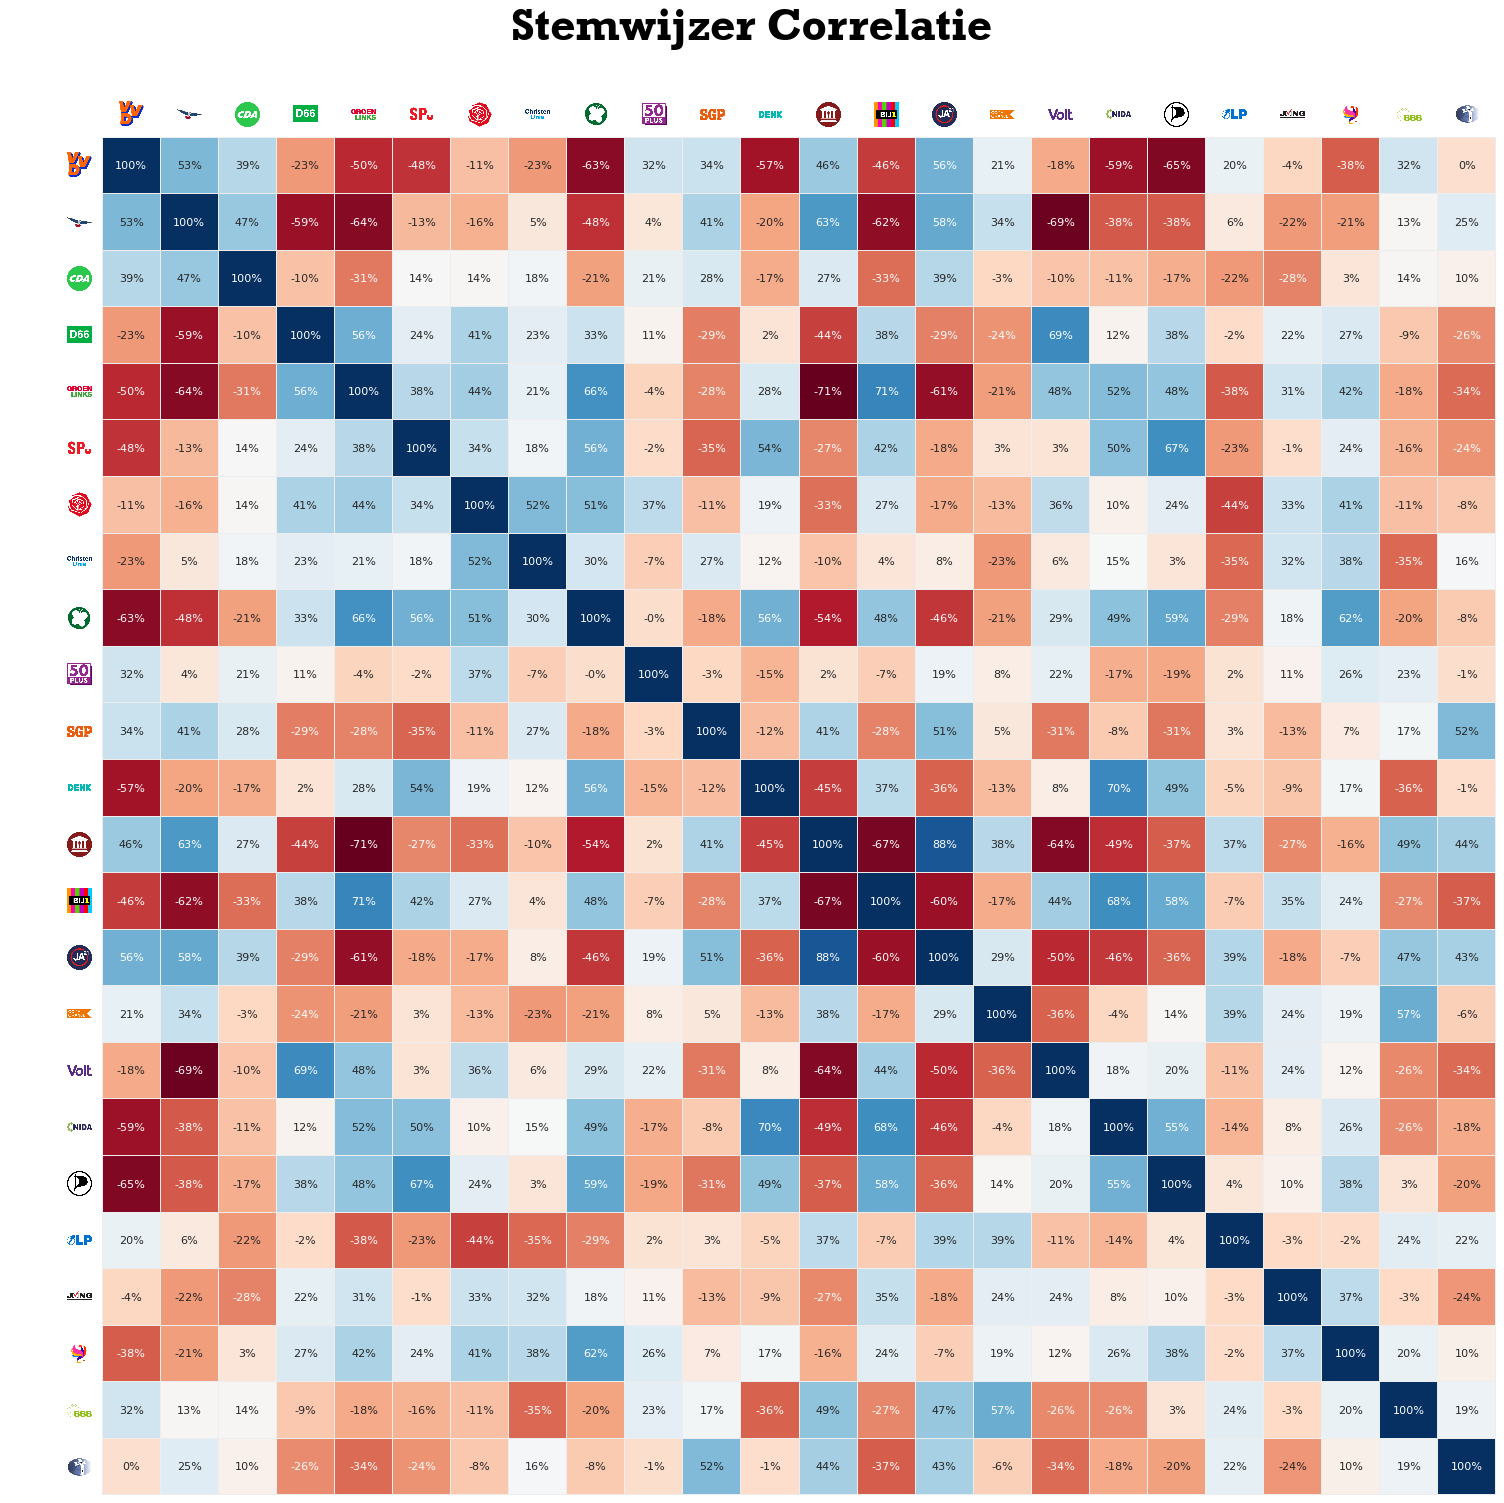

In [6]:
fig, ax = plt.subplots(figsize=(24,24), dpi=80, facecolor='white')

correlation_totaal = stemwijzer_totaal.T.corr()

# Custom annotation
annot = correlation_totaal.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation_totaal, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(partijen_totaal):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.1)
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.1)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=40, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation.png', dpi=300, bbox_inches='tight')

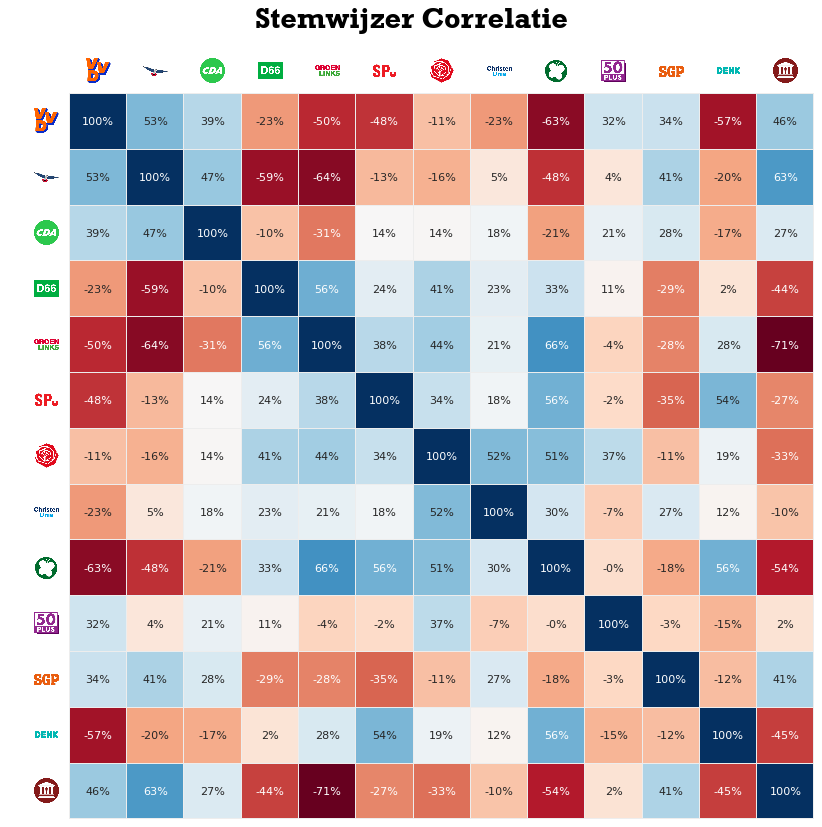

In [7]:
fig, ax = plt.subplots(figsize=(13,13), dpi=80, facecolor='white')

# Correlation between parties
correlation = stemwijzer_zetel.T.corr()

# Custom annotation
annot = correlation.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(partijen_zetel):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.1)
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.1)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=26, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation_current.png', dpi=300, bbox_inches='tight')

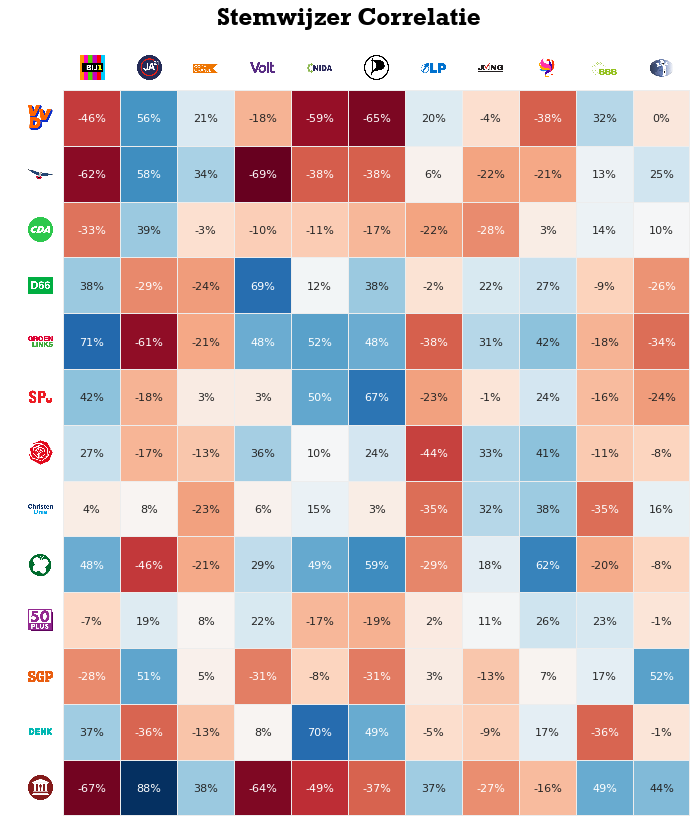

In [8]:
fig, ax = plt.subplots(figsize=(11,13), dpi=80, facecolor='white')

correlation_nieuw = (pd.concat([stemwijzer_zetel.T, stemwijzer_nieuw.T], axis=1,
                                keys=['stemwijzer_zetel', 'stemwijzer_nieuw'])
                     .corr().loc['stemwijzer_zetel', 'stemwijzer_nieuw'])

# Custom annotation
annot = correlation_nieuw.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation_nieuw, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(partijen_nieuw):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.1)
for pos, party in enumerate(partijen_zetel):
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.1)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=22, fontweight='bold', fontname='Rockwell')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation_new.png', dpi=300, bbox_inches='tight')

## Principal Component Analysis

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(stemwijzer_zetel)
print(pca.explained_variance_ratio_)

[0.40793401 0.14281116]


In [10]:
pc_1 = principal_components[:, 0]
pc_2 = principal_components[:, 1]

x_min, x_max = pc_1.min(), pc_1.max()
y_min, y_max = pc_2.min(), pc_2.max()

In [11]:
pc_features = pd.DataFrame(pca.components_, columns=stemwijzer_zetel.columns, index=['pc1', 'pc2']).transpose()
pc_features

,pc1,pc2
vaccinatiebewijs,0.032113,0.343476
verhogen defensiebudget,0.201139,0.224723
gratis kinderopvang,-0.213043,0.165312
nederland uit eu,0.131042,-0.094513
rekeningrijden,-0.162294,0.123813
vuurwerk toestaan,0.152115,0.031351
vleesbelasting,-0.176408,0.075053
bezuinigen publieke omroep,0.199257,-0.222548
zorgfonds,-0.170976,-0.250956
verbod gezichtsbedekkende kleding,0.144224,0.004489


In [12]:
features_ordered = pd.DataFrame()
for pc in pc_features.columns:
    features_ordered[pc] = pc_features[pc].sort_values(ascending=False).index
features_ordered

,pc1,pc2
0,vaker gevangenisstaffen ipv taakstraffen,voltooid leven
1,geen nieuwe beperkingen voor boerenbedrijven,vaccinatiebewijs
2,kerncentrale,mondkapjesplicht
3,koppeling minimumloon en bijstand,legaliseren softdrugs
4,verhogen defensiebudget,verhogen defensiebudget
5,bezuinigen publieke omroep,inburgering op locatie
6,inburgering op locatie,nederlandstalig hoger onderwijs
7,vuurwerk toestaan,gratis kinderopvang
8,verbod gezichtsbedekkende kleding,rekeningrijden
9,nederland uit eu,kerncentrale


## Political Spectrum (1D)

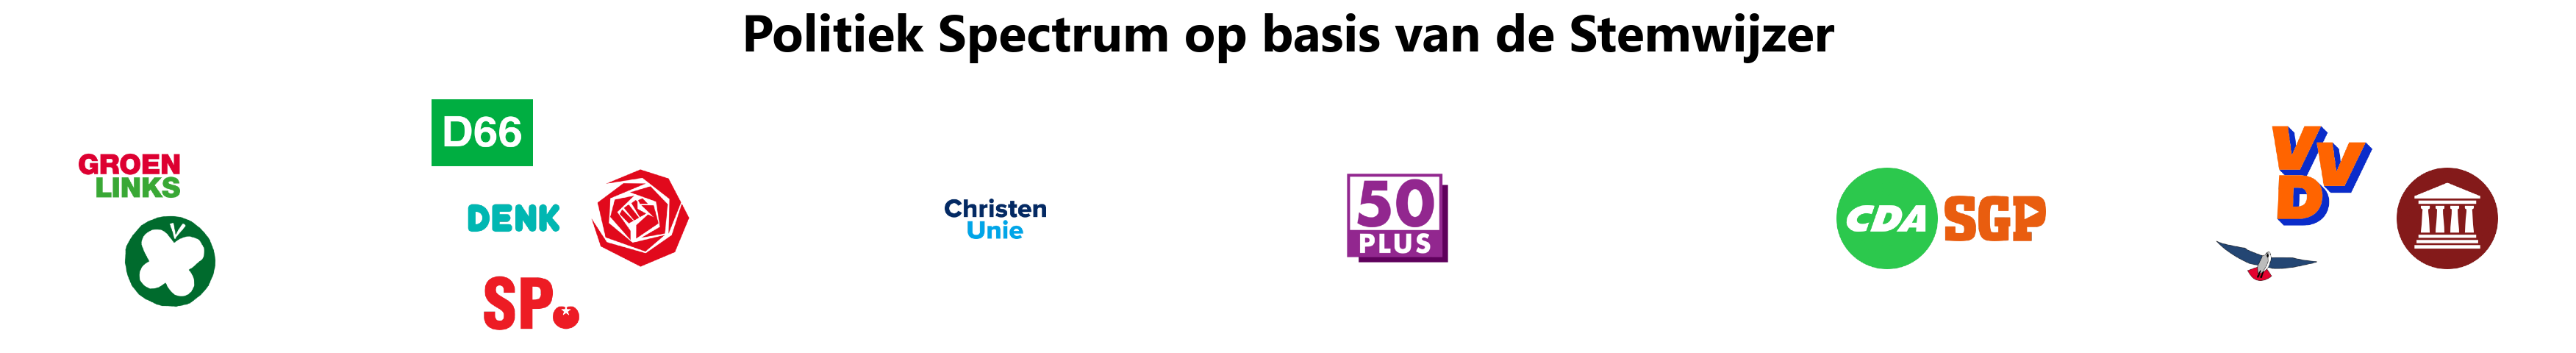

In [13]:
fig, ax = plt.subplots(figsize=(20,2), dpi=180, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

# Plot title
ax.set_title('Politiek Spectrum op basis van de Stemwijzer', pad=40,
             fontsize=28, fontweight='bold', fontname='segoe ui')

# Plot logos
y_pos = [0.5, -0.5, 0, 1, .5, -1, 0, 0, -.5, 0, 0, 0, 0, 0]  # y nudges
for x, y, party in zip(pc_1, y_pos, partijen_zetel):
    plot_logo(x, y, f"logos/{party}.png", ax=ax, zoom=.25)

fig.savefig('figures/political_spectrum.png', dpi=300, bbox_inches='tight')

## Political Compass (2D)

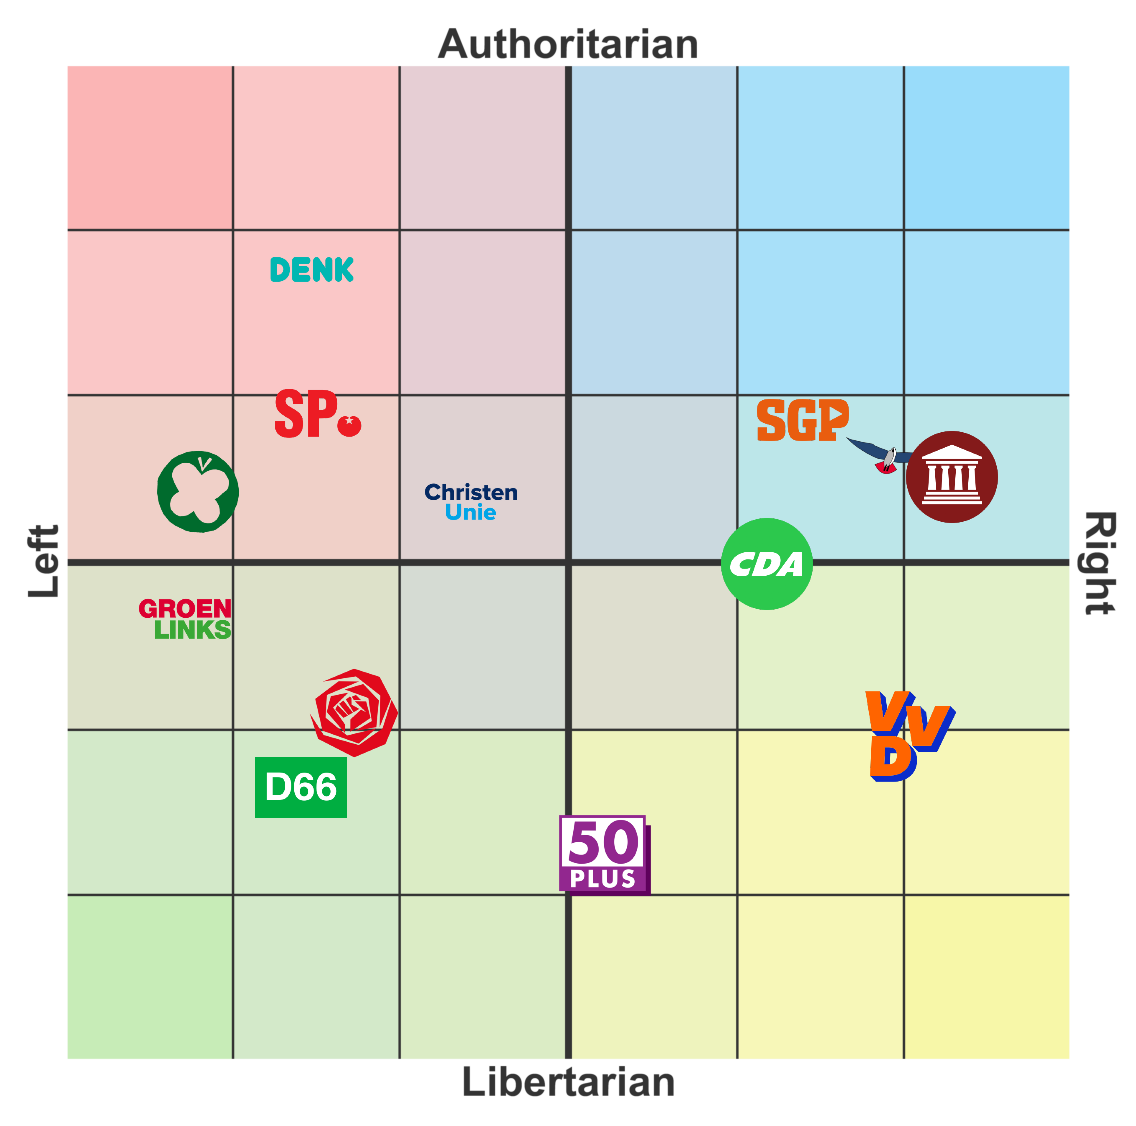

In [14]:
fig, ax = plt.subplots(figsize=(10,10), dpi=120, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

# Plot political compass template
img = plt.imread('logos/political_compass_template.png')
ax.imshow(img, extent=[x_min-2, x_max+2, y_max+3, y_min-3], alpha=.8)

for x, y, party in zip(pc_1, pc_2, partijen_zetel):
    plot_logo(x, y, f"logos/{party}.png", ax=ax, zoom=.25)

fig.savefig('figures/political_compass.png', dpi=300, bbox_inches='tight')

## Zetels

In [15]:
zetel_verdeling = {'vvd': 33, 'pvv': 20, 'cda': 19, 'd66': 19, 'groenlinks': 14,
                   'sp': 14, 'pvda': 9, 'cu': 5, 'pvdd': 5, '50plus': 4,
                   'sgp': 3, 'denk': 3, 'fvd': 2}
sum(zetel_verdeling.values())

150

In [16]:
def get_parties(row):
    '''Retuns the parties that agree with the statement'''
    parties = []
    for party in zetel_verdeling:
        if row[party] > 0:
            parties.append(party)
    return ', '.join(parties) 

In [17]:
stelling_zetels = stemwijzer_totaal.transpose()
for partij, zetels in zetel_verdeling.items():
    stelling_zetels[partij] = np.where(stelling_zetels[partij] == 1, zetels, 0)

stelling_zetels['voorstanders'] = stelling_zetels.apply(get_parties, axis=1)
stelling_zetels['zetels'] = stelling_zetels.sum(axis=1)

stelling_zetels = stelling_zetels[['voorstanders', 'zetels']]
stelling_zetels.sort_values('zetels', ascending=False, inplace=True)

with pd.option_context('display.max_colwidth', -1):
    display(stelling_zetels)

,voorstanders,zetels
mondkapjesplicht,"vvd, pvv, cda, d66, groenlinks, sp, pvda, cu, 50plus",133
nederlandstalig hoger onderwijs,"vvd, pvv, cda, d66, groenlinks, pvda, cu, pvdd, 50plus, sgp, fvd",130
verhogen defensiebudget,"vvd, pvv, cda, d66, pvda, cu, 50plus, sgp, fvd",115
verbod gezichtsbedekkende kleding,"vvd, pvv, cda, sp, pvda, cu, pvdd, 50plus, sgp, fvd",115
salaris basisschool gelijk aan middelbareschool,"pvv, cda, d66, groenlinks, sp, pvda, cu, pvdd, sgp, denk",113
vuurwerk toestaan,"vvd, pvv, cda, d66, sp, fvd",106
inburgering op locatie,"vvd, pvv, cda, pvda, cu, 50plus, fvd",93
middenschool,"cda, d66, groenlinks, sp, pvda, pvdd, 50plus, denk",90
voltooid leven,"vvd, d66, groenlinks, pvda, pvdd, 50plus",89
gratis kinderopvang,"cda, d66, groenlinks, sp, pvda, pvdd, 50plus",89
